<a href="https://colab.research.google.com/github/Sanjayvaradha/Self_driving_car/blob/main/Self_driving_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Sanjayvaradha/Track1


fatal: destination path 'Track1' already exists and is not an empty directory.


In [ ]:
!ls Track1

driving_log.csv  IMG


In [ ]:
!pip3 install imgaug

In [ ]:
 import os
 import   numpy as np
 import matplotlib.pyplot as plt
 import matplotlib.image as mping
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.optimizers import Adam
 from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
 from sklearn.utils import shuffle
 from sklearn.model_selection import train_test_split
 import cv2
 import pandas as pd
 from imgaug import augmenters as iaa
 import ntpath
 import random

In [ ]:
np.random.seed(0)
datadir = 'Track1'
columns = ['center','left','right','steering','throttle','reverse','speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names = columns) # load data from csv file and want to give csv file's path for that
pd.set_option('display.max_colwidth',-1)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\sanjay\Desktop\Self drive data\IMG\center_2020_08_21_23_41_15_647.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\left_2020_08_21_23_41_15_647.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\right_2020_08_21_23_41_15_647.jpg,0.0,0.0,0.0,0.000078
1,C:\Users\sanjay\Desktop\Self drive data\IMG\center_2020_08_21_23_41_15_750.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\left_2020_08_21_23_41_15_750.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\right_2020_08_21_23_41_15_750.jpg,0.0,0.0,0.0,0.000078
2,C:\Users\sanjay\Desktop\Self drive data\IMG\center_2020_08_21_23_41_15_855.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\left_2020_08_21_23_41_15_855.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\right_2020_08_21_23_41_15_855.jpg,0.0,0.0,0.0,0.000078
3,C:\Users\sanjay\Desktop\Self drive data\IMG\center_2020_08_21_23_41_15_963.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\left_2020_08_21_23_41_15_963.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\right_2020_08_21_23_41_15_963.jpg,0.0,0.0,0.0,0.000078
4,C:\Users\sanjay\Desktop\Self drive data\IMG\center_2020_08_21_23_41_16_063.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\left_2020_08_21_23_41_16_063.jpg,C:\Users\sanjay\Desktop\Self drive data\IMG\right_2020_08_21_23_41_16_063.jpg,0.0,0.0,0.0,0.000078


In [ ]:
def path_leaf(path):
  head,tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2020_08_21_23_41_15_647.jpg,left_2020_08_21_23_41_15_647.jpg,right_2020_08_21_23_41_15_647.jpg,0.0,0.0,0.0,0.000078
1,center_2020_08_21_23_41_15_750.jpg,left_2020_08_21_23_41_15_750.jpg,right_2020_08_21_23_41_15_750.jpg,0.0,0.0,0.0,0.000078
2,center_2020_08_21_23_41_15_855.jpg,left_2020_08_21_23_41_15_855.jpg,right_2020_08_21_23_41_15_855.jpg,0.0,0.0,0.0,0.000078
3,center_2020_08_21_23_41_15_963.jpg,left_2020_08_21_23_41_15_963.jpg,right_2020_08_21_23_41_15_963.jpg,0.0,0.0,0.0,0.000078
4,center_2020_08_21_23_41_16_063.jpg,left_2020_08_21_23_41_16_063.jpg,right_2020_08_21_23_41_16_063.jpg,0.0,0.0,0.0,0.000078


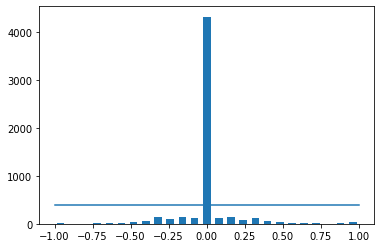

In [ ]:
num_bins = 25
samples_per_bin =400
hist,bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1]+bins[1:]) * 0.5  # beacause bins of interval not centered.
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

totaldata: 5605
removed: 3927
remaining: 1678


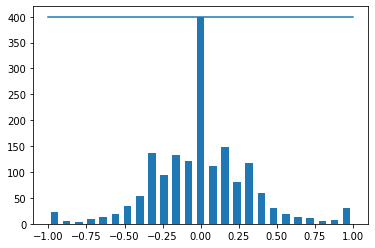

In [ ]:
print('totaldata:', len(data))
removelist=[]
for j in range (num_bins):
  list_ = []
  for i in range (len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)    
  list_ = list_[samples_per_bin:]
  removelist.extend(list_)
  
print('removed:' ,len(removelist))
data.drop(data.index[removelist], inplace = True)

print('remaining:',len(data))

hist,_ = np.histogram(data['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

In [ ]:
print(data.iloc[5])
def load_img_steering(datadir,df):
  image_path = []
  steering = []
  for i in range (len(data)):
    indexed_data = data.iloc[i]
    center,left,right = indexed_data[0],indexed_data[1],indexed_data[2]

    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))

    #image_path.append(os.path.join(datadir,left.strip()))
    #steering.append(float(indexed_data[3])+0.15)

    # right image append
    #image_path.append(os.path.join(datadir,right.strip()))
    #steering.append(float(indexed_data[3])-0.15)

  image_paths = np.asarray(image_path)  
  steerings = np.asarray(steering)
  return image_paths,steerings

image_paths,steerings = load_img_steering(datadir + '/IMG', data)
 

center      center_2020_08_21_23_41_19_520.jpg
left        left_2020_08_21_23_41_19_520.jpg  
right       right_2020_08_21_23_41_19_520.jpg 
steering   -0.621728                          
throttle    1                                 
reverse     0                                 
speed       15.038                            
Name: 37, dtype: object


In [ ]:

X_train, X_valid, y_train, y_valid = train_test_split(image_paths,steerings,test_size=0.2, random_state=5)
print('training-{}\n valid: {}'.format(len(X_train),len(X_valid)))

training-1342
 valid: 336


Text(0.5, 1.0, 'Validation set')

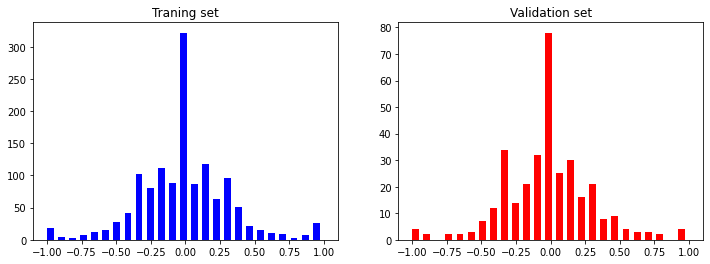

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train, bins = num_bins,width = 0.05,color = 'blue')
axes[0].set_title('Traning set')
axes[1].hist(y_valid, bins = num_bins,width = 0.05,color = 'red')
axes[1].set_title('Validation set')


Text(0.5, 1.0, 'zoom image')

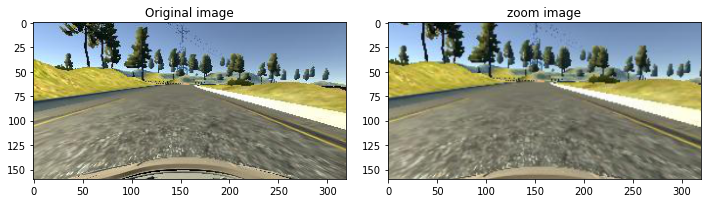

In [ ]:

def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

image = image_paths[random.randint(0,1000)]
original_image = mping.imread(image)
zoom_image = zoom(original_image)

fig, axs = plt.subplots(1,2,figsize=(10,15))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')

axs[1].imshow(zoom_image)
axs[1].set_title('zoom image')


Text(0.5, 1.0, 'panned image')

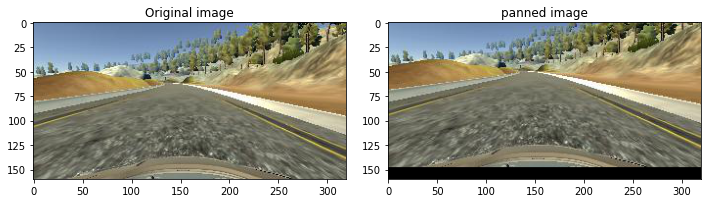

In [ ]:
def pan(image):
  pan = iaa.Affine( translate_percent={'X': (-0.1,0.1), 'y' : (-0.1,0.1)} )
  image = pan.augment_image(image)
  return image

image = image_paths[random.randint(0,1000)]
original_image = mping.imread(image)
pan_image = pan(original_image)

fig, axs = plt.subplots(1,2,figsize=(10,15))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')

axs[1].imshow(pan_image)
axs[1].set_title('panned image')

Text(0.5, 1.0, 'bright image')

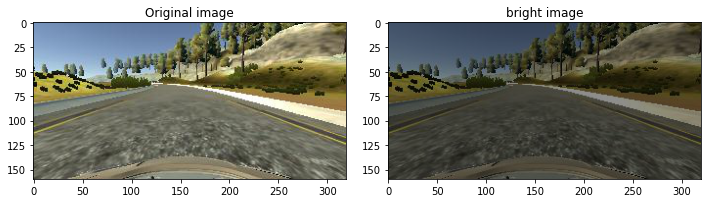

In [ ]:
def brightness(image):
  image =   iaa.Multiply((0.2,1.2)).augment_image(image)
  return image

image = image_paths[random.randint(0,1000)]
original_image = mping.imread(image)
bright_image = brightness(original_image)

fig, axs = plt.subplots(1,2,figsize=(10,15))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')

axs[1].imshow(bright_image)
axs[1].set_title('bright image')

0.1590747


Text(0.5, 1.0, 'flip image - steering_angle : -0.1590747')

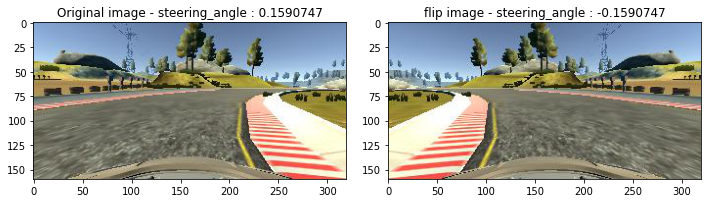

In [ ]:
def flip(image,steering_angle):
  image = cv2.flip(image,1)
  steering_angle = -steering_angle
  return image,steering_angle

random_index = random.randint(0,1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]
print(str(steering_angle))

original_image = mping.imread(image)
flip_image, steering_angle_flipped = flip(original_image,steering_angle)

fig, axs = plt.subplots(1,2,figsize=(10,15))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original image - ' + 'steering_angle : '+ str(steering_angle))

axs[1].imshow(flip_image)
axs[1].set_title('flip image - ' + 'steering_angle : '+ str(steering_angle_flipped))


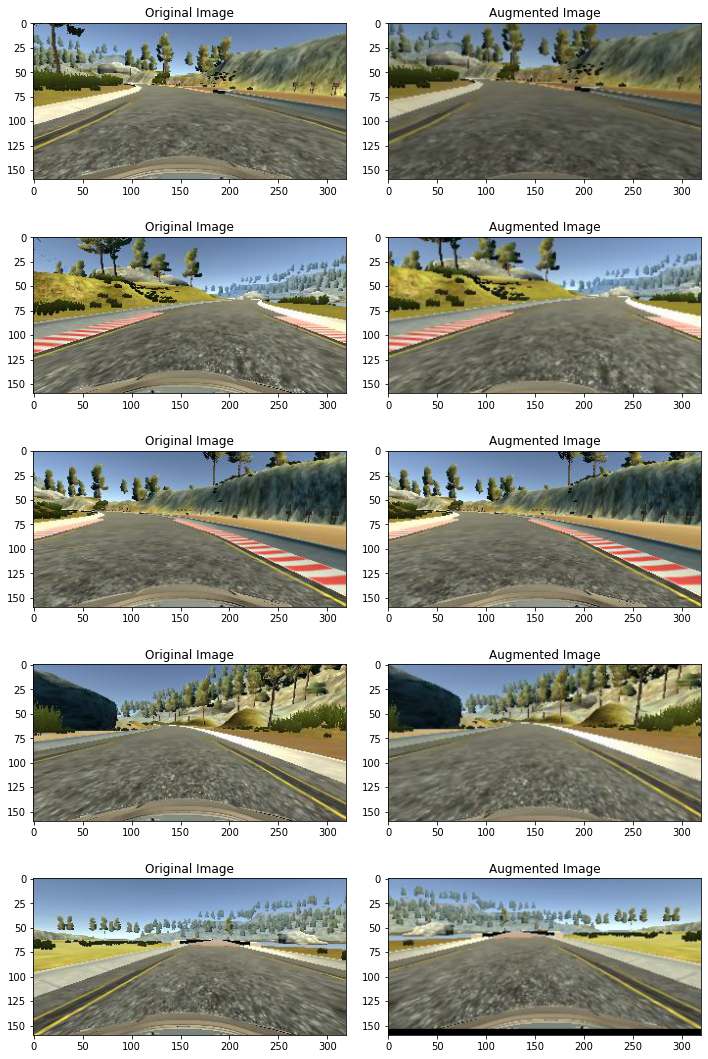

In [ ]:
def random_augment(image, steering_angle):
    image = mping.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = flip(image, steering_angle)
    
    return image, steering_angle


fig, axs = plt.subplots(5,2,figsize=(10,15))
fig.tight_layout()
#########  for Viewing ########################
for i in range(5):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mping.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")


In [ ]:
def img_preprocess (img):
  #img=mping.imread(img)
  img = img[60:135,: ,: ]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3),0) # 0 is deviation
  img = cv2.resize(img, (200,66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed image')

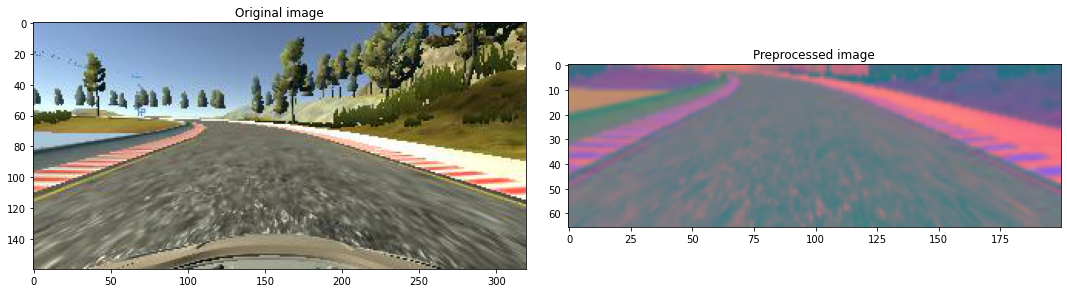

In [ ]:
image = image_paths[100]
original_img = mping.imread(image)
preprocess_img  = img_preprocess(original_img)
fig,axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_img)
axs[0].set_title("Original image")
axs[1].imshow(preprocess_img)
axs[1].set_title("Preprocessed image")

In [ ]:


def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mping.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  


Text(0.5, 1.0, 'Validation Image')

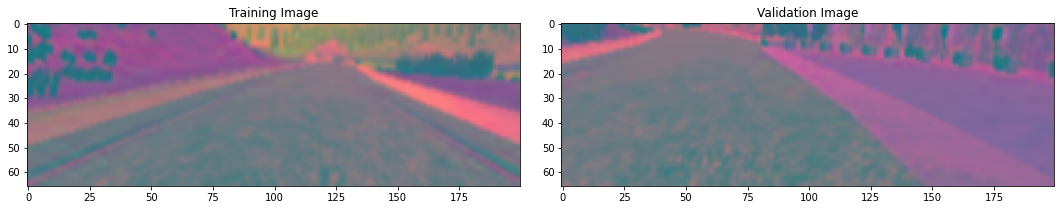

In [ ]:


x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [ ]:
#X_train = np.array(list(map(img_preprocess, X_train))) #map will return preprocessed img like updating the current values/img present in it
#X_valid = np.array(list(map(img_preprocess, X_valid)))

In [ ]:
#plt.imshow(X_train[random.randint(0,len(X_train)-1)])
#plt.axis("off")
#print(X_train.shape)

In [ ]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24,(5,5),input_shape = (66,200,3),strides=(2,2),activation='elu'))

  model.add(Conv2D(36,(5,5),strides=(2,2),activation='elu'))
  model.add(Conv2D(48,(5,5),strides=(2,2),activation='elu'))
  model.add(Conv2D(64,(3,3),activation='elu'))
 # model.add(Dropout(0.5))

  model.add(Conv2D(64,(3,3),activation='elu'))
 # model.add(Dropout(0.5))

  model.add(Flatten())
  
  model.add(Dense(100,activation='elu'))
 # model.add(Dropout(0.5))
  
  model.add(Dense(50,activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation='elu'))
 # model.add(Dropout(0.5))

  model.add(Dense(1))

  model.compile(Adam(lr=1e-5),loss = 'mse')
  return model



In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)              

In [ ]:
#history = model.fit(X_train,y_train,batch_size=100,epochs=40, validation_data=(X_valid,y_valid),verbose=1,shuffle=1)
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=400, 
                                  epochs=30,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
400/400 [==============================] - 216s 539ms/step - loss: 0.1478 - val_loss: 0.0977
Epoch 2/30
400/400 [==============================] - 217s 543ms/step - loss: 0.1078 - val_loss: 0.0909
Epoch 3/30
400/400 [==============================] - 215s 539ms/step - loss: 0.1035 - val_loss: 0.0896
Epoch 4/30
400/400 [==============================] - 213s 534ms/step - loss: 0.0992 - val_loss: 0.0794
Epoch 5/30
400/400 [==============================] - 213s 534ms/step - loss: 0.0927 - val_loss: 0.0756
Epoch 6/30
400/400 [==============================] - 216s 542ms/step - loss: 0.0902 - val_loss: 0.0756
Epoch 7/30
400/400 [==============================] - 217s 543ms/step - loss: 0.0876 - val_loss: 0.0736
Epoch 8/30
400/400 [==============================] - 215s 540ms/step - loss: 0.0889 - val_loss: 0.0725
Epoch 9/30
400/400 [==============================] - 216s 542ms/step - loss: 0.0862 - val_loss: 0.0714
Epoch 10/30
400/400 [==============================] - 216s 542m

Text(0.5, 0, 'epoch')

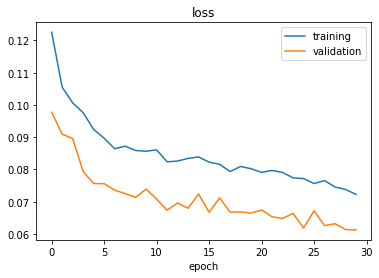

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>